# Facial Expression Recognition using VGG19 - Part  2/3 

## Abstract

* In this part, we used VGG19 Convolutional Neural Network model for getting the best testing accuracy to see how good will our model predict the expressions on human faces and categorize them into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

### Dataset Introduction

* The dataset we have chosen is Facial Expression Recognition fer2013. The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

* The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. Our task is to predict the "emotion" column.

* The training set consists of 28,709 examples. The public test set consists of 3,589 examples. The final test set, consists of another 3,589 examples.

* This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

* Link to the dataset - https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

`Conclusion` - We trained VGG19 model here, resulting in the accuracy of `58.0%`

## Project Implementation

### Part 2 - VGG19

* VGG-19 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 19 layers deep and can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.
* We will be using VGG-19 pre-trained through ImageNet. ImageNet is a large visual database covering over 14 million URLs of images and more than 20 thousand ambiguous categories which helps to cover more diverse feature when it comes to natural images.

#### TFLearn:

TFlearn is a modular and transparent deep learning library built on top of Tensorflow. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.

In [1]:
import tflearn
import numpy as np
from numpy import genfromtxt
from tflearn.data_preprocessing import ImagePreprocessing
import keras

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [0]:
#read the dataset
with open("../fer2013.csv") as f:
    content = f.readlines()
#Converting lines to array as the lines represent the pixels
lines = np.array(content)

num_of_instances = lines.size

* The method readlines() reads until EOF using readline() and returns a list containing the lines.
* Then np.array() creates an array of the list containing the lines from above.

In [0]:
x_train, y_train, x_test, y_test = [], [], [], []

#creating training and testing data [4]
for i in range(1,num_of_instances):
    emotion, img, usage = lines[i].split(",")
    val = img.split(" ")
            
    pixels = np.array(val, 'float32')
        
    emotion = keras.utils.to_categorical(emotion, 7)
    #Creating training and testing set
    if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
    elif 'PublicTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)

* The split() method splits a string into a list by the given separator.
* keras.utils.to_categorical() - Converts a class vector (integers) to binary class matrix.

In [0]:
#Converting our training variables to NP array
x_train = np.asarray(x_train, 'float32')
y_train = np.asarray(y_train, 'float32')
x_test = np.asarray(x_test, 'float32')
y_test = np.asarray(y_test, 'float32')

#Since the images are 48x48, reshaping the array to 48x48. And 1 is for grayscale and -1 will automatically detect the number of images.
x_train = x_train.reshape([-1, 48, 48, 1])
x_test = x_test.reshape([-1, 48, 48, 1])

* The np.asarray() method converts the given input to an array.
* .reshape() - Reshapes the images in the array object to 48x48 without changing its data.

In [6]:
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression


# Building 'VGG Network'
network = input_data(shape=[None, 48, 48, 1])

network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 128, 3, activation='relu')
network = conv_2d(network, 128, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 256, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = fully_connected(network, 1024, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 1024, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 7, activation='softmax')

network = regression(network, optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     learning_rate=0.0001)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
model = tflearn.DNN(network, checkpoint_path='model_vgg',
                    max_checkpoints=1, tensorboard_verbose=0)

Instructions for updating:
Use tf.cast instead.


In [8]:
#loading the previously trained model to retrain it
model.load('vgg19_emotion.tfl')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /content/vgg19_final.tfl


In [9]:
#training the model
model.fit(x_train, y_train, n_epoch=200, shuffle=True,
          show_metric=True, batch_size=128, snapshot_step=20,
          snapshot_epoch=False, run_id='vgg_emotion')

Training Step: 67499  | total loss: 0.05512 | time: 24.189s
| RMSProp | epoch: 200 | loss: 0.05512 - acc: 0.9936 -- iter: 28672/28709
Training Step: 67500  | total loss: 0.05089 | time: 24.298s
| RMSProp | epoch: 200 | loss: 0.05089 - acc: 0.9935 -- iter: 28709/28709
--


* Retraining the loaded model by tuning the parameters

In [10]:
#evaluating the testing score
score = model.evaluate(x_test, y_test)
print('Test accuarcy: ', score)

Test accuarcy:  [0.5801058790791032]


* Evaluating the Testing accuracy which comes to 58.0%

In [0]:
#save the trained model
model.save('vgg19_emotion.tfl')

* Saving the trained model here 

In [0]:
def detect_emotion(emotions):
    """
    This function classifies the image by converting it NP into array and then predicting the results
    """
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

* The above function classifies the input image by converting it into array and then predicts the results.
* The np.arange(len(objects)) here returns evenly spaced value of length of objects 

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


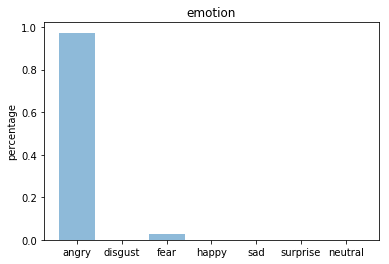

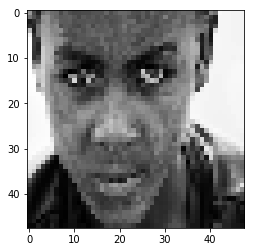

In [14]:
img = image.load_img("angryface.jpeg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)

x = x.flatten()
x = x.reshape([-1, 48, 48, 1])

emotion_prediction = model.predict(x)
detect_emotion(emotion_prediction[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

* img_to_array() - Converts the image to array

### OpenCV:

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. The C++ API provides a class ‘videocapture’ for capturing video from cameras or for reading video files and image sequences. It is basically used to access the Webcam of our computer to capture real-time videos

In [0]:
#Detecing expessions by feeding a video or webcam
import cv2
from collections import deque
import operator
emotion_queue = deque(maxlen=10)

In [0]:
# calculate the avearge emotion
def smooth_emotions(prediction):
    """
    As the model will provide the mixture of results this function will give average of the emotions to 1 emotion
    
    """
    emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    emotion_values = {'Angry': 0.0, 'Disgust': 0.0, 'Fear': 0.0, 'Happy': 0.0, 'Sad': 0.0, 'Surprise': 0.0, 'Neutral': 0.0}

    emotion_probability, emotion_index = max((val, idx) for (idx, val) in enumerate(prediction[0]))
    emotion = emotions[emotion_index]

    # Append the new emotion and if the max length is reached pop the oldest value out
    emotion_queue.appendleft((emotion_probability, emotion))

    # Iterate through each emotion in the queue and create an average of the emotions
    for pair in emotion_queue:
        emotion_values[pair[1]] += pair[0]

    # Select the current emotion based on the one that has the highest value
    average_emotion = max(emotion_values.items(), key=operator.itemgetter(1))[0]
    return average_emotion

* The above function takes processed image as input and provides the average of the emotions to 1 emotion from the mixture of results provided by the model

In [0]:
# preprocessing the input image
def process_image(roi_gray, img):
        image_scaled = np.array(cv2.resize(roi_gray, (48, 48)), dtype=float)
        image_processed = image_scaled.flatten()
        image_processed = image_processed.reshape([-1, 48, 48, 1])

        prediction = model.predict(image_processed)
        emotion = smooth_emotions(prediction)

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "Emotion: " + emotion, (50, 450), font, 1, (0, 255, 255), 2)
        cv2.imshow('img', img)

* The above function performs a series of preprocessing steps on input image by reshaping and flattening. Then it feeds the processed image to the model for it to predict

### Detecting objects through webcam

The below code is used to detect objects through webcam. To capture a video, we need to create a VideoCapture object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1). You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame.

In [0]:
# detecting human faces using HAAR cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#cap = cv2.VideoCapture(0) # 0 for webcam
cap = cv2.VideoCapture("../face_detection.mp4") # input the name of your video file here

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        process_image(roi_gray, img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Conclusion


* After training the model on almost 600 epochs and tuning hyperparameters the training and testing accuracy came out to be 99.3% and 58.0% respectively.

* But, the problem with VGG was as the epochs increases the loss was also increasing instead of decreasing. Also, the VGG19 architecture is very heavy and takes lot of computation power. So it was difficult to train VGG again and try to improve accuracy.

* Below table summarizes the values and the score that we could produce using the respective combination.
 

Model No. | training accuracy | testing accuracy
-----------------|----------------|----------------------
VGG19 | 99.3 % | 58.0%


## Contribution

In the above analysis:

- 60% of the work is done by us which includes
  * VGG19 architecture implementation
  * Live webcam code optimization

- 40% of the work is taken from web, the links for which are cited below

## Citations

* For face detection - https://www.youtube.com/watch?v=PmZ29Vta7Vc

* For VGG19 and ResNet - https://github.com/tflearn/tflearn/tree/master/examples/images

* For tflearn - http://tflearn.org/tutorials/

* Article on Facial Emotion Recognition using CNN - http://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

* VGG19 CNN - https://www.mathworks.com/help/deeplearning/ref/vgg19.html;jsessionid=ccf9599bd865b423281a56299a68

## License

<font size="4">MIT License</font>
    
<b>Copyright (c) 2019 RUPESH ACHARYA, PREETAM JAIN</b>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
